In [22]:
from Lattes import Lattes
from Carga import Carga
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import psycopg2
from psycopg2.extensions import AsIs
import statsmodels.api as sm
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
#from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [32]:
SQL = '''

	select "Ano Referência", "Sexo", "Beneficiário",
		ROUND (SUM("Valor Pago")) AS pgto
	FROM public.pagamentos
	WHERE NOT "Ano Referência" = 206
        AND NOT "Sexo" IS NULL
	GROUP BY "Ano Referência", "Sexo", "Beneficiário"

'''

In [33]:
engine = Carga.db_engine()
pd = pandas.read_sql(SQL, engine)

ProgrammingError: (psycopg2.errors.GroupingError) aggregate functions are not allowed in WHERE
LINE 8:         AND ROUND (SUM("Valor Pago")) > 0
                           ^

[SQL: 

	select "Ano Referência", "Sexo", "Beneficiário",
		ROUND (SUM("Valor Pago")) AS pgto
	FROM public.pagamentos
	WHERE NOT "Ano Referência" = 206
        AND NOT "Sexo" IS NULL
        AND ROUND (SUM("Valor Pago")) > 0
	GROUP BY "Ano Referência", "Sexo", "Beneficiário"

]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [25]:
pd.head()

,Ano Referência,Sexo,Beneficiário,pgto
0,2002.0,F,Abisair Andrade de Castro,12875.0
1,2002.0,F,Acacia Zeneida Kuenzer,11917.0
2,2002.0,F,Achilea Candida Lisboa Bittencourt,13692.0
3,2002.0,F,Adaise Gouvêa Lopes Hubert,8694.0
4,2002.0,F,Adalgisa Arantes Campos,10649.0


In [58]:
pd.tail()

,Ano Referência,Sexo,Beneficiário,pgto
2127121,2021.0,M,Zion Nascimento de Souza,4800.0
2127122,2021.0,M,Zoilo Pires de Camargo,32600.0
2127123,2021.0,M,Zuilho Rodrigues Castro Segundo,300.0
2127124,2021.0,M,Zwinglio de Oliveira Guimarães Filho,13200.0
2127125,2021.0,M,Zyon Issami Shiga,4800.0


In [52]:
pd.shape

(2124382, 4)

In [29]:
pd.isna().sum()

Ano Referência      0
Sexo                0
Beneficiário        0
pgto              694
dtype: int64

In [55]:
pd = pd[ (pd['pgto'].notnull()) & (pd['pgto']>0)]

In [51]:
pd.isna().sum()

Ano Referência    0
Sexo              0
Beneficiário      0
pgto              0
dtype: int64

In [46]:
pd.dtypes

Ano Referência    float64
Sexo               object
Beneficiário       object
pgto              float64
dtype: object

In [47]:
pd.corr()

,Ano Referência,pgto
Ano Referência,1.000000,-0.011792
pgto,-0.011792,1.000000


In [56]:
pd.describe()

,Ano Referência,pgto
count,2.124381e+06,2.124381e+06
mean,2.013701e+03,1.266583e+04
std,4.614674e+00,4.531946e+04
min,2.002000e+03,2.000000e+00
25%,2.011000e+03,2.000000e+03
50%,2.014000e+03,4.000000e+03
75%,2.017000e+03,1.499600e+04
max,2.021000e+03,1.339635e+07


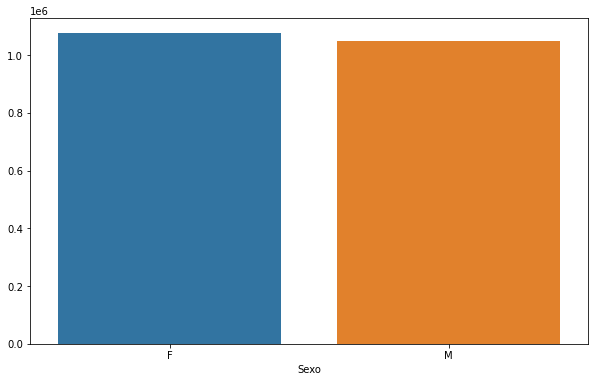

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sexo', data=pd)
plt.xlabel('Sexo')
plt.ylabel('');

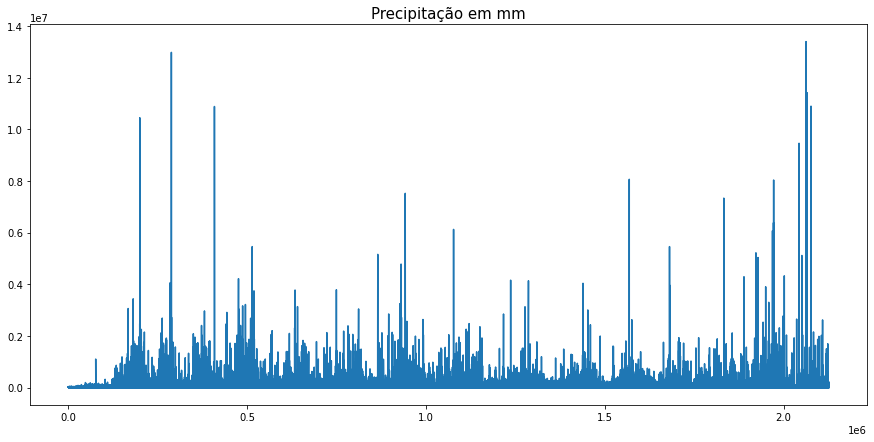

In [74]:
pd['pgto'].plot(figsize=(15,7))
plt.title('Precipitação em mm',size=15);

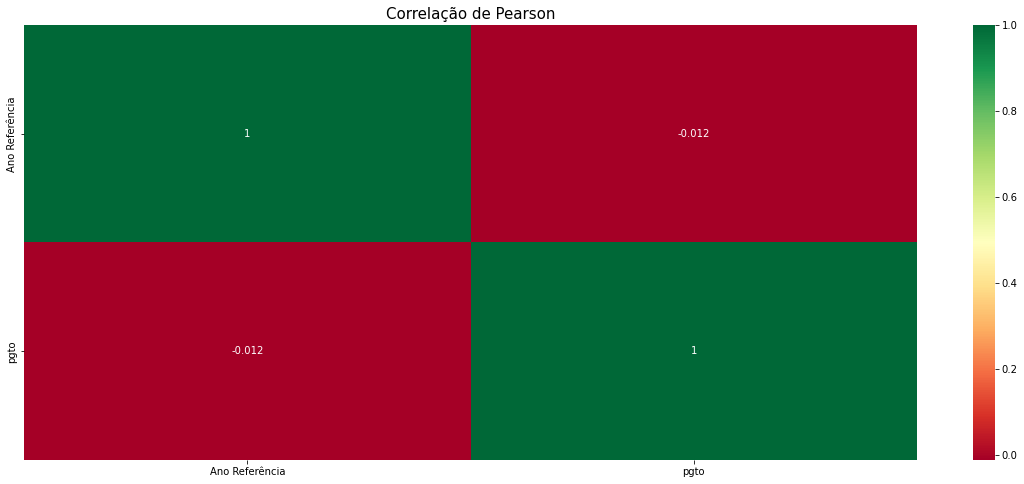

In [75]:
plt.figure(figsize=(20,8))
sns.heatmap(pd.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação de Pearson',size=15);

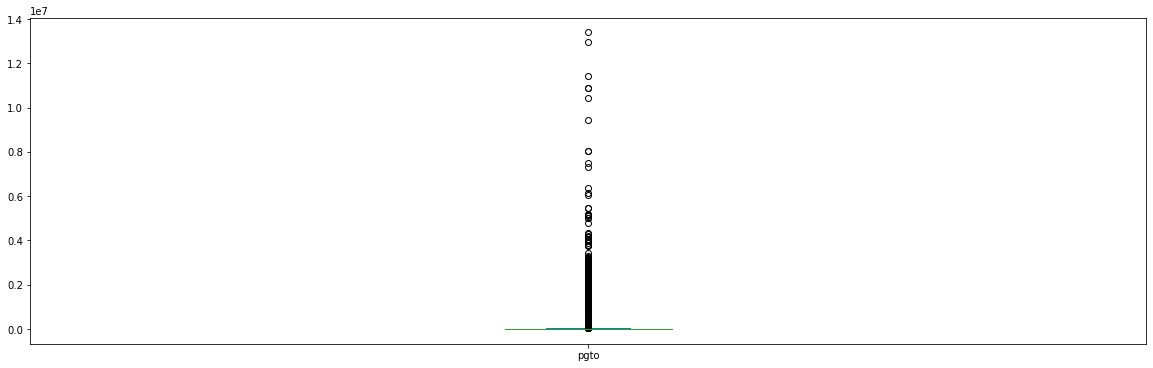

In [77]:
pd['pgto'].plot.box(figsize=(20,6));


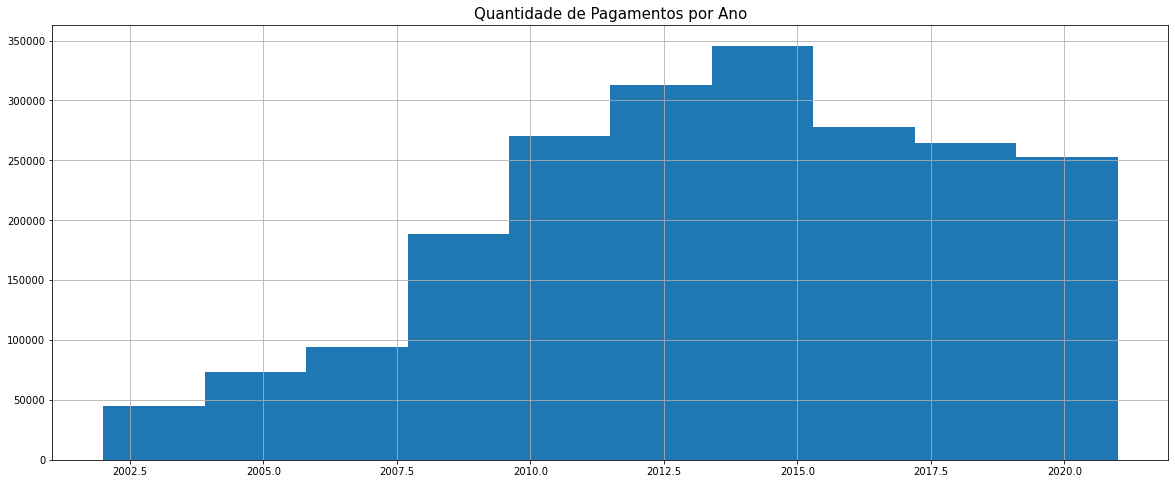

In [83]:
pd['Ano Referência'].hist(figsize=(20,8), bins=10);
plt.title('Quantidade de Pagamentos por Ano',size=15);

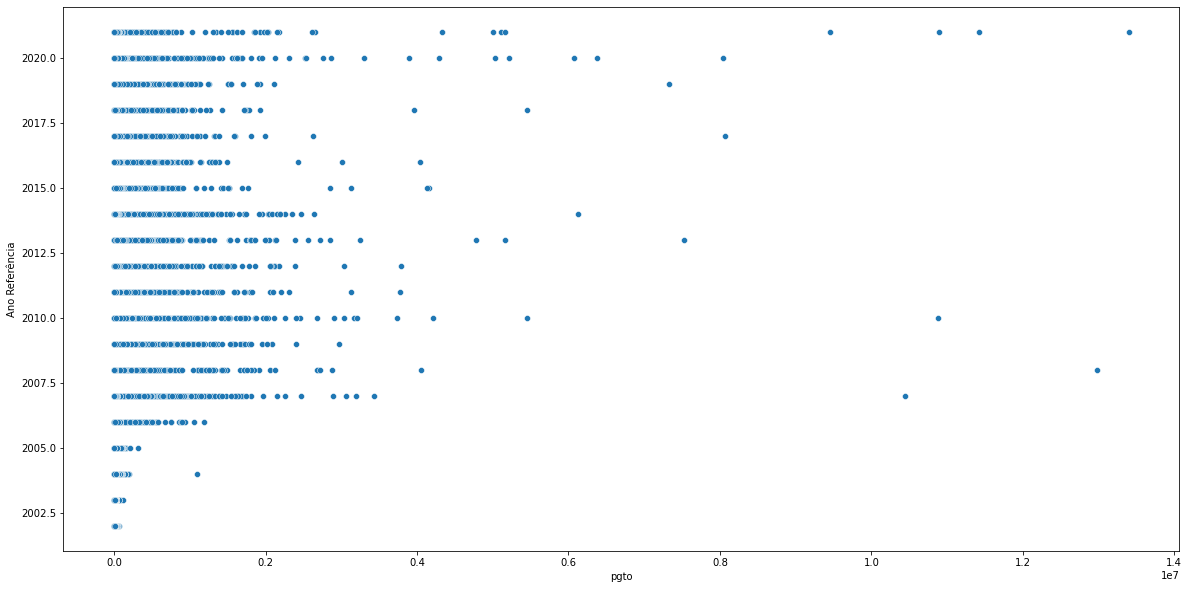

In [91]:
#fig,ax = plt.subplots(2,2, figsize=(20,10))
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='pgto',y='Ano Referência',data = pd);
#sns.scatterplot(x='Consumo de cerveja (litros)',y='Temperatura Minima (C)',data = cerveja,ax=ax[0][1]);
#sns.scatterplot(x='Consumo de cerveja (litros)',y='Temperatura Maxima (C)',data = cerveja,ax=ax[1][0]);
#sns.scatterplot(x='Consumo de cerveja (litros)',y='Precipitacao (mm)',data = cerveja,ax=ax[1][1]);

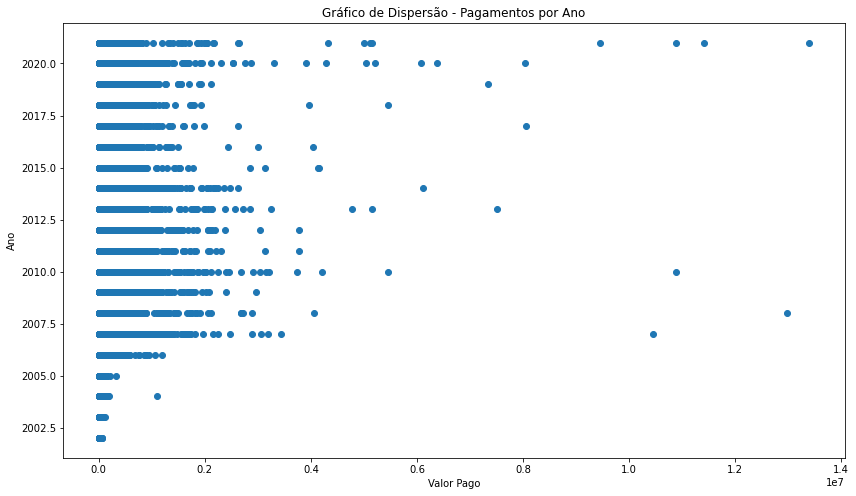

In [100]:
X = pd['pgto']
y = pd['Ano Referência']
plt.figure(figsize=(14,8))
plt.scatter(X,y, alpha=1)
plt.title('Gráfico de Dispersão - Pagamentos por Ano')
plt.xlabel('Valor Pago')
plt.ylabel('Ano')
#plt.ylim(0,1100)
#plt.xlim(0,1000000)
plt.show()

In [150]:
pd.sexo = pandas.get_dummies(pd['Sexo'])

pd['F'] = pd[pd['Sexo'] == 'F']
pd['M'] = pd[pd['Sexo'] == 'M']

In [160]:
pd['F'] = pd.sexo.F
pd['M'] = pd.sexo.M

In [152]:
pd['F']

0          1
1          1
2          1
3          1
4          1
          ..
2127121    0
2127122    0
2127123    0
2127124    0
2127125    0
Name: F, Length: 2124381, dtype: uint8

In [181]:
X = pd.drop(['pgto', 'Sexo', 'Beneficiário', 'sexo', "Ano Referência"], axis = 1)
y = pd['pgto']


In [182]:
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [183]:
modelo.score(X,y)

0.0016650592094364924

In [184]:
modelo.intercept_

12689.88048947828

In [185]:
modelo.coef_

array([-1849.42287094,  1849.42287094])

modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo com intercepto')


In [186]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Sumário do modelo sem intercepto                       
==============================================================================
Dep. Variable:                   pgto   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3543.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:15:24   Log-Likelihood:            -2.5789e+07
No. Observations:             2124381   AIC:                         5.158e+07
Df Residuals:                 2124379   BIC:                         5.158e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F           1.084e+04     43.653    248.331      0.000    1.08e+04    1.09e+04
M           1.454e+04     44.225    328.761      0.000    1.45e+04    1.46e+04
==============================================================================
Omnibus:                  8203822.807   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   27892853314873.707
Skew:                          91.149   Prob(JB):                         0.00
Kurtosis:                   17753.598   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
10840

In [32]:
regression = LinearRegression()

In [33]:
regression.fit(X,y)

LinearRegression()

In [34]:
regression.coef_

array([[-1.36799692e-22,  1.00000000e+00]])

In [35]:
regression.intercept_

array([-2.22044605e-16])

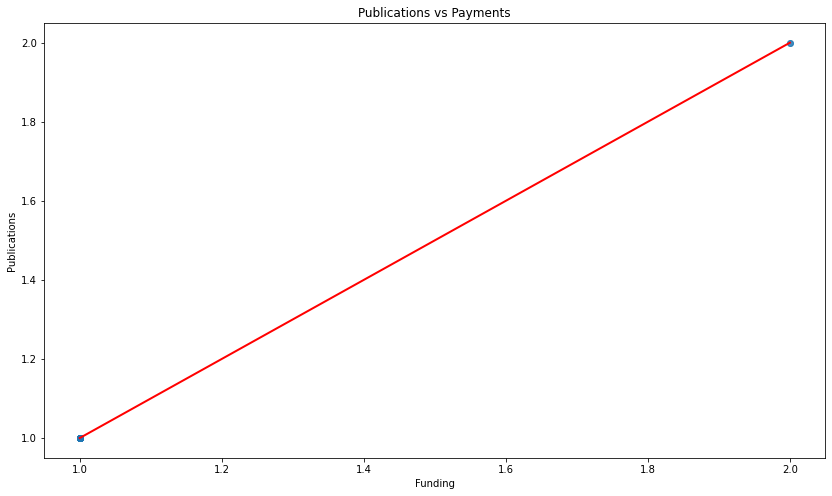

In [36]:
plt.figure(figsize=(14,8))
plt.scatter(X['qty_2014'],y, alpha=0.6)
plt.plot(X['qty_2014'], regression.predict(X), color="red", linewidth=2)
plt.title('Publications vs Payments')
plt.xlabel('Funding')
plt.ylabel('Publications')
#plt.ylim(0,1100)
#plt.xlim(0,1000000)
plt.show()

In [37]:
score = regression.score(X,y)

In [38]:
score

1.0

In [15]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               qty_2020   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.836e+31
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:03:57   Log-Likelihood:                 5119.6
No. Observations:                 148   AIC:                        -1.023e+04
Df Residuals:                     145   BIC:                        -1.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.996e-16   1.69e-16      2.962      0.0

C:\Python\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
 est2.pvalues['pgtos']<0.1

True

In [41]:
pd[pd['pgtos']!=0].pgtos.mean()

47080.833333333336

In [42]:
est2.rsquared

1.0

In [43]:
dir(est2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [51]:
est2.params

const       4.996004e-16
pgtos       5.293956e-21
qty_2014    1.000000e+00
dtype: float64

In [52]:
est2.pvalues

const       0.003576
pgtos       0.000009
qty_2014    0.000000
dtype: float64

In [54]:
est2.rsquared

1.0

In [63]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               qty_2020   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.836e+31
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:15:37   Log-Likelihood:                 5119.6
No. Observations:                 148   AIC:                        -1.023e+04
Df Residuals:                     145   BIC:                        -1.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.996e-16   1.69e-16      2.962      0.0

In [62]:
est2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     1.000      
Dependent Variable: qty_2020         AIC:                -10233.2389
Date:               2022-03-04 10:14 BIC:                -10224.2473
No. Observations:   148              Log-Likelihood:     5119.6     
Df Model:           2                F-statistic:        1.836e+31  
Df Residuals:       145              Prob (F-statistic): 0.00       
R-squared:          1.000            Scale:              5.3724e-32 
--------------------------------------------------------------------
          Coef.  Std.Err.           t           P>|t|  [0.025 0.975]
--------------------------------------------------------------------
const     0.0000   0.0000                2.9617 0.0036 0.0000 0.0000
pgtos     0.0000   0.0000                4.6054 0.0000 0.0000 0.0000
qty_2014  1.0000   0.0000 6022582358160538.0000 0.0000 1.0000 1.0000
--------------------------------------------------------------------
Omnibus:              39.493        Durbin-Watson:           0.551  
Prob(Omnibus):        0.000         Jarque-Bera (JB):        503.223
Skew:                 -0.367        Prob(JB):                0.000  
Kurtosis:             12.004        Condition No.:           222780 
====================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [64]:
dir(est2.save)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [65]:
type(est2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [114]:
chamada = 'UNIVERSAL 2016 - FAIXA B'
programa = 'PROGRAMA BASICO DE ENGENHARIA QUIMICA'
CA = None
área = None
indicador = '@ANO-DE-INICIO CURSO-TECNICO-PROFISSIONALIZANTE '
data = '2020-01-01'
path='d:/Lattes/Linnear Regression Models/'

In [118]:
import os

In [119]:
    parâmetros = {}
    parâmetros['chamada'] = chamada
    parâmetros['programa'] = programa
    parâmetros['CA'] = CA
    parâmetros['área'] = área
    parâmetros['indicador'] = indicador
    parâmetros['data'] = data

In [121]:
    filename = path + urlencode(parâmetros, doseq=True)
    os.path.isfile(filename)

True

In [110]:
lista_indicadores[0][0]

0

In [128]:
SQL = f'''
        SELECT count(*) 
        FROM resultados_regressao_linear
        WHERE
'''
if not chamada == None: SQL += f'''\n            chamada = '{chamada}' and'''
if not programa == None: SQL += f'''            programa = '{programa}' and'''
if not ca == None: SQL += f'''            ca = '{ca}' and'''
if not area == None: SQL += f'''            area = '{area}' and'''
if not indicador == None: SQL += f'''            indicador = '{indicador}' and'''
if not data == None: SQL += f'''            data = '{data}' and'''
SQL += '\n            1 = 1'
    
conn = None
try:
    params = Database.config_db_connection()
    conn = psycopg2.connect(**params)
    cur = conn.cursor()
    cur.execute(SQL)
    lista_indicadores = cur.fetchall()
    conn.commit()
    cur.close()
except (Exception, psycopg2.DatabaseError) as error:
    print (error)
finally:
    if conn is not None:
        conn.close()

In [124]:
print(SQL)


        SELECT count(*) 
        FROM resultados_regressao_linear
        WHERE
            chamada = 'UNIVERSAL 2016 - FAIXA B' and
            programa = 'PROGRAMA BASICO DE ENGENHARIA QUIMICA' and
            ca = 'None' and
            area = 'None' and
            indicador = '@ANO-DE-INICIO CURSO-TECNICO-PROFISSIONALIZANTE ' and
            data = '2020-01-01'
        


In [1]:
lista_indicadores[0][0]

NameError: name 'lista_indicadores' is not defined

In [16]:
est2

In [17]:
est2.pvalues['const']

0.0035759714123511244

In [18]:
est2.pvalues.get('const')

0.0035759714123511244